### Feature Sampling

지금까지 비정형 금융 데이터 집합으로부터 연속이고 동질이며 구조화된 데이터셋을 생성하는 방법을 배웠다. 머신러닝 알고리즘을 이러한 데이터셋에 적용해 보려 시도할 수 있지만, 대체로 이는 몇 가지 이유로 인해 좋은 아이디어가 되지 못한다.

1. 몇몇 머신러닝 알고리즘은 표본의 크기가 커지면 효율적으로 작동하지 않는다
2. 머신러닝 알고리즘은 연관된 예제로부터 학습할 때 가장 높은 정확성을 보인다

5% 절대값 수익률이 양수일지, 음수일지 예측하고자 한다고 가정해 보자. 임의의 시점에서는 이러한 예측이 정확할 가능성은 낮을 것이다. 그러나 어떤 촉매가 되는 사건이 발생한 이후에 분류 방법론을 사용해 다음 5% 절대 수익률의 부호를 예측한다면 보다 정교한 예측을 할 수 있는 정보 특성을 찾을 가능성이 높다. 앞서 추출한 Bar를 표본 추출하여 연관된 학습 예제가 있는 특성 행렬을 생성하는 방법을 알아보자

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
from FinancialMachineLearning.barsampling.core import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
import sys
print(sys.path)
path_name = "/Users/garciaj42/code/MLFinance/claude"
sys.path.insert(0, path_name)
sys.path.insert(0, "/Users/garciaj42/code/MLFinance")

['/Users/garciaj42/code/MLFinance', '/Users/garciaj42/code/MLFinance/claude', '/Users/garciaj42/code/MLFinance', '/Users/garciaj42/code/MLFinance/claude', '/Users/garciaj42/code/MLFinance', '/Users/garciaj42/code/MLFinance/claude', '/Users/garciaj42/code/MLFinance/claude/notebooks', '/Users/garciaj42/code/MLFinance/claude/notebooks', '/Users/garciaj42/code/MLFinance', '/opt/homebrew/Cellar/python@3.9/3.9.19_1/Frameworks/Python.framework/Versions/3.9/lib/python39.zip', '/opt/homebrew/Cellar/python@3.9/3.9.19_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9', '/opt/homebrew/Cellar/python@3.9/3.9.19_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/lib-dynload', '', '/opt/homebrew/lib/python3.9/site-packages', '/opt/homebrew/lib/python3.9/site-packages/IPython/extensions', '/Users/garciaj42/.ipython']


In [35]:
from feature_storage import FeatureStorage

fs = FeatureStorage(path_name + "/Data/financial_features.parquet")
data = fs.load_existing_features()[0]

# Reset the index
data.reset_index(inplace=True, drop=True)

In [36]:
data

,date_time,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value,...,^AXJO,^FTSE,^GDAXI,EUR=X,CL=F,SPY,TLT,LQD,HG=F,Date
0,2009-12-29 03:12:00,201,1122.75,1125.50,1122.50,1123.75,225966.00,112416.75,201,2.540193e+08,...,4845.100098,5437.600098,6011.549805,0.697200,78.870003,85.441978,59.236633,60.926666,3.296,2009-12-29 00:00:00+00:00
1,2009-12-29 05:57:00,354,1123.50,1125.50,1123.50,1125.25,172084.50,113604.50,153,1.935338e+08,...,4845.100098,5437.600098,6011.549805,0.697210,78.870003,85.441978,59.236633,60.926666,3.296,2009-12-29 05:00:00+00:00
2,2009-12-29 09:22:00,556,1125.25,1128.25,1125.00,1126.50,227633.50,111557.25,202,2.564907e+08,...,4845.100098,5437.600098,6011.549805,0.697213,78.870003,85.441978,59.236633,60.926666,3.296,2009-12-29 06:00:00+00:00
3,2009-12-29 12:15:00,729,1126.75,1126.75,1122.50,1123.00,194573.25,79867.25,173,2.187998e+08,...,4845.100098,5437.600098,6011.549805,0.697213,78.870003,85.441978,59.236633,60.926666,3.296,2009-12-29 06:00:00+00:00
4,2009-12-29 14:48:00,882,1123.25,1124.25,1122.25,1123.75,171902.75,106741.25,153,1.931131e+08,...,4833.299805,5437.600098,6011.549805,0.697227,78.870003,85.441978,59.236633,60.926666,3.296,2009-12-29 13:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492754,2024-11-13 16:32:00,5214508,6020.25,6021.25,6019.75,6021.25,48167.25,30106.00,8,2.899864e+08,...,8224.000000,8030.299805,19003.109375,0.944450,68.430000,595.186829,89.142883,107.483551,4.066,2024-11-13 13:00:00+00:00
492755,2024-11-13 16:41:00,5214517,6021.50,6022.25,6021.25,6021.75,54198.75,24088.50,9,3.263668e+08,...,8224.000000,8030.299805,19003.109375,0.944450,68.430000,595.186829,89.142883,107.483551,4.066,2024-11-13 13:00:00+00:00
492756,2024-11-13 16:46:00,5214522,6022.00,6022.25,6022.00,6022.25,30112.25,30112.25,5,1.813405e+08,...,8224.000000,8030.299805,19003.109375,0.944450,68.430000,595.186829,89.142883,107.483551,4.066,2024-11-13 13:00:00+00:00
492757,2024-11-13 16:52:00,5214528,6021.50,6021.50,6019.50,6019.50,36123.75,0.00,6,2.174815e+08,...,8224.000000,8030.299805,19003.109375,0.944450,68.430000,595.186829,89.142883,107.483551,4.066,2024-11-13 13:00:00+00:00


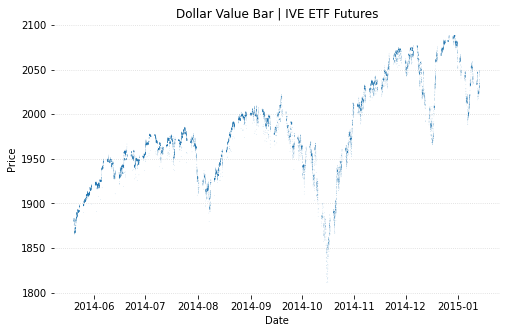

In [37]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.scatter(
    data.loc[147500 : 167500]['date_time'],
    data.loc[147500 : 167500]['close'],
    s = 1, 
    marker = '.', 
    edgecolor = 'none', 
    alpha = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Dollar Value Bar | IVE ETF Futures')
plt.show()

In [38]:
from FinancialMachineLearning.filter.filter import cusum_filter

cusum_events = cusum_filter(
    data.close, 
    threshold = 1.5, 
    time_stamps = False
)

In [39]:
cusum_events

[2,
 3,
 5,
 6,
 9,
 10,
 11,
 13,
 16,
 19,
 22,
 25,
 28,
 29,
 33,
 38,
 41,
 43,
 44,
 47,
 53,
 56,
 58,
 59,
 60,
 63,
 70,
 74,
 80,
 82,
 85,
 87,
 98,
 101,
 105,
 106,
 108,
 110,
 117,
 118,
 119,
 130,
 133,
 137,
 141,
 144,
 147,
 148,
 150,
 153,
 155,
 157,
 163,
 169,
 181,
 186,
 188,
 191,
 193,
 200,
 203,
 206,
 214,
 216,
 219,
 222,
 229,
 234,
 240,
 257,
 267,
 273,
 278,
 288,
 300,
 308,
 311,
 320,
 333,
 348,
 356,
 358,
 359,
 362,
 367,
 368,
 372,
 375,
 378,
 392,
 396,
 397,
 416,
 434,
 440,
 441,
 459,
 473,
 480,
 482,
 484,
 488,
 491,
 495,
 506,
 517,
 527,
 535,
 536,
 549,
 557,
 562,
 574,
 581,
 603,
 610,
 614,
 619,
 626,
 631,
 632,
 633,
 634,
 635,
 638,
 644,
 647,
 657,
 662,
 664,
 667,
 672,
 678,
 680,
 684,
 697,
 708,
 717,
 722,
 739,
 750,
 769,
 793,
 797,
 803,
 805,
 807,
 811,
 823,
 824,
 827,
 828,
 836,
 838,
 839,
 842,
 845,
 855,
 861,
 873,
 880,
 884,
 898,
 902,
 906,
 915,
 928,
 935,
 940,
 949,
 953,
 958,
 960,


In [40]:
cusum_filtered = data.loc[cusum_events]

In [41]:
cusum_filtered

,date_time,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value,...,^AXJO,^FTSE,^GDAXI,EUR=X,CL=F,SPY,TLT,LQD,HG=F,Date
2,2009-12-29 09:22:00,556,1125.25,1128.25,1125.00,1126.50,227633.50,111557.25,202,2.564907e+08,...,4845.100098,5437.600098,6011.549805,0.697213,78.870003,85.441978,59.236633,60.926666,3.2960,2009-12-29 06:00:00+00:00
3,2009-12-29 12:15:00,729,1126.75,1126.75,1122.50,1123.00,194573.25,79867.25,173,2.187998e+08,...,4845.100098,5437.600098,6011.549805,0.697213,78.870003,85.441978,59.236633,60.926666,3.2960,2009-12-29 06:00:00+00:00
5,2009-12-29 18:35:00,1053,1123.75,1124.75,1121.25,1122.00,191998.50,102163.25,171,2.155466e+08,...,4833.299805,5437.600098,6011.549805,0.697227,78.870003,85.441978,59.236633,60.926666,3.2960,2009-12-29 13:00:00+00:00
6,2009-12-29 21:43:00,1226,1121.75,1122.25,1119.00,1119.50,193807.25,101934.00,173,2.171035e+08,...,4833.299805,5437.600098,6011.549805,0.697227,78.870003,85.441978,59.236633,60.926666,3.2960,2009-12-29 13:00:00+00:00
9,2009-12-30 06:43:00,1724,1119.75,1119.75,1114.00,1115.50,175286.00,78153.50,157,1.956748e+08,...,4833.299805,5397.899902,5957.430176,0.697433,79.279999,85.411591,59.626083,60.996864,3.3255,2009-12-30 06:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492748,2024-11-13 15:47:00,5214463,6025.25,6026.50,6022.50,6022.50,48210.25,18082.00,8,2.904788e+08,...,8224.000000,8030.299805,19003.109375,0.944450,68.430000,595.186829,89.142883,107.483551,4.0660,2024-11-13 13:00:00+00:00
492749,2024-11-13 15:53:00,5214469,6022.00,6022.25,6015.25,6015.25,36117.25,6022.25,6,2.173792e+08,...,8224.000000,8030.299805,19003.109375,0.944450,68.430000,595.186829,89.142883,107.483551,4.0660,2024-11-13 13:00:00+00:00
492751,2024-11-13 16:08:00,5214484,6015.50,6018.75,6015.50,6018.75,42126.50,30093.75,7,2.534767e+08,...,8224.000000,8030.299805,19003.109375,0.944450,68.430000,595.186829,89.142883,107.483551,4.0660,2024-11-13 13:00:00+00:00
492754,2024-11-13 16:32:00,5214508,6020.25,6021.25,6019.75,6021.25,48167.25,30106.00,8,2.899864e+08,...,8224.000000,8030.299805,19003.109375,0.944450,68.430000,595.186829,89.142883,107.483551,4.0660,2024-11-13 13:00:00+00:00


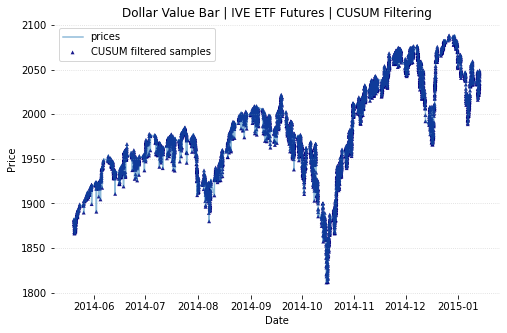

In [43]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(
    data.loc[147500 : 167500]['date_time'],
    data.loc[147500 : 167500]['close'],
    alpha = 0.5,
    label = 'prices'
)
ax.scatter(
    cusum_filtered.loc[147500 : 167500]['date_time'],
    cusum_filtered.loc[147500 : 167500]['close'],
    alpha = 0.9,
    marker = '^',
    label = 'CUSUM filtered samples',
    edgecolor = 'none',
    color = 'navy',
    s = 15
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('Dollar Value Bar | IVE ETF Futures | CUSUM Filtering')
plt.show()

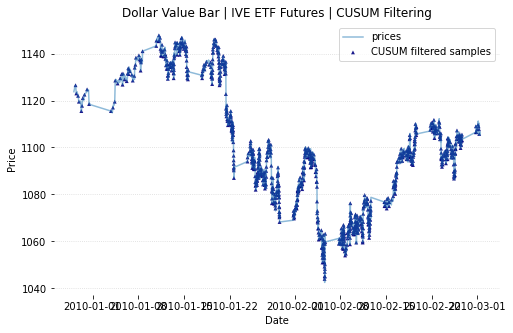

In [44]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(
    data.loc[: 5000]['date_time'],
    data.loc[: 5000]['close'],
    alpha = 0.5,
    label = 'prices'
)
ax.scatter(
    cusum_filtered.loc[: 5000]['date_time'],
    cusum_filtered.loc[: 5000]['close'],
    alpha = 0.9,
    marker = '^',
    label = 'CUSUM filtered samples',
    edgecolor = 'none',
    color = 'navy',
    s = 15
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('Dollar Value Bar | IVE ETF Futures | CUSUM Filtering')
plt.show()

변수 $S_t$는 Structural Break Statistics, Entropy 또는 Market microstructural featurs 등 모든 특성에 기반을 둘 수 있다. 예를 들어서, Supremum ADF 통계량이 이전의 레벨로부터 충분히 벗어날 때마다 이벤트가 발생할 수 있다

Event driven bar의 부분 집합을 얻으면 이러한 이벤트의 발생이 실행 가능성 정보를 구성하는지를 Machine Learning 알고리즘이 결정하도록 한다